In [ ]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Dropout, BatchNormalization, Input
import matplotlib.pyplot as plt
import glob

In [4]:
!wget https://descargas.inf.santiago.usm.cl/train/1.tar.gz

--2025-12-06 17:34:50--  https://descargas.inf.santiago.usm.cl/train/1.tar.gz
Resolving descargas.inf.santiago.usm.cl (descargas.inf.santiago.usm.cl)... 200.1.22.243
Connecting to descargas.inf.santiago.usm.cl (descargas.inf.santiago.usm.cl)|200.1.22.243|:443... connected.
ERROR: cannot verify descargas.inf.santiago.usm.cl's certificate, issued by ‘CN=E6,O=Let's Encrypt,C=US’:
  Issued certificate has expired.
To connect to descargas.inf.santiago.usm.cl insecurely, use `--no-check-certificate'.


In [5]:
EPS_PATH = '/content/EPSILON'
KAP_PATH = '/content/KAPPA'

# Cargar todos los archivos EPSILON y KAPPA
epsilon_files = sorted(os.listdir(EPS_PATH))
kappa_files = sorted(os.listdir(KAP_PATH))

epsilons = [np.load(os.path.join(EPS_PATH, file)) for file in epsilon_files]
kappas = [np.load(os.path.join(KAP_PATH, file)) for file in kappa_files]

# Convertir las listas en arrays numpy y reordenar ejes para que sean (128, 128, 3)
X = np.array([np.transpose(epsilon, (1, 2, 0)) for epsilon in epsilons])
#X = X / np.max(X)  # Normalización
y = np.array(kappas)
#y = y / np.max(y)  # Normalización de las etiquetas

FileNotFoundError: [Errno 2] No such file or directory: '/content/EPSILON'

In [ ]:
# Verifica el tamaño de los archivos cargados
print(f"Total epsilon files: {len(epsilon_files)}")
print(f"Total kappa files: {len(kappa_files)}")

Total epsilon files: 4019
Total kappa files: 1504


In [ ]:
# Dividir en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [4019, 1504]

In [ ]:
# Construcción de modelo CNN
model = Sequential([
    Input(shape=(128, 128, 3)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2), padding='same'),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2), padding='same'),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2), padding='same'),

    Conv2D(512, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.5),

    UpSampling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),

    UpSampling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),

    UpSampling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),

    Conv2D(1, (3, 3), activation='relu', padding='same')
])

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 20s 187ms/step - loss: 8.3140e-04 - val_loss: 9.1574e-04
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - loss: 8.2811e-04 - val_loss: 9.5446e-04
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - loss: 8.1226e-04 - val_loss: 8.2468e-04
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - loss: 8.0580e-04 - val_loss: 8.7007e-04
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 94ms/step - loss: 7.9706e-04 - val_loss: 8.1931e-04
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - loss: 7.8497e-04 - val_loss: 8.7289e-04
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - loss: 7.5398e-04 - val_loss: 8.2644e-04
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - loss: 7.5851e-04 - val_loss: 8.9565e-04
Epoch 9/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - loss: 7.6336e-04 - val_loss: 8.1085e-04
Epoch 10/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - loss: 7.2916e-04 - val_loss: 8.5122e-04
Epoch 11/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - loss: 7

In [ ]:
# Evaluación del modelo y predicción
y_pred = model.predict(X_val)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


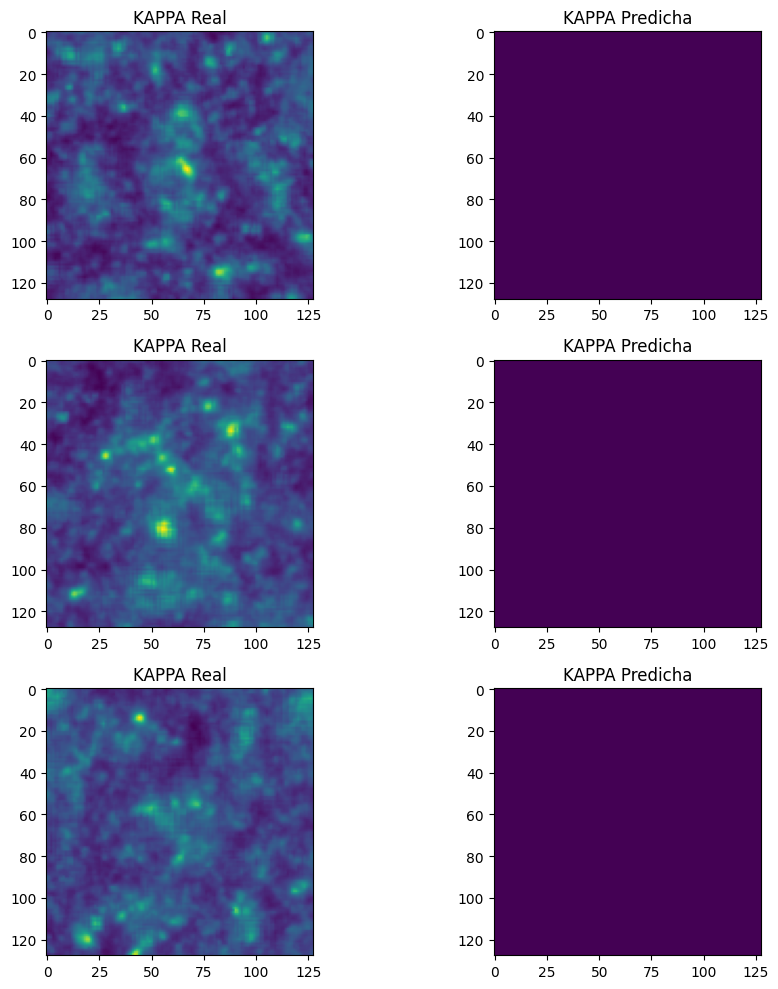

In [ ]:
# Visualizar algunas predicciones vs real
num_examples = 3
fig, axes = plt.subplots(num_examples, 2, figsize=(10, 10))
for i in range(num_examples):
    axes[i, 0].imshow(y_val[i], cmap='viridis')
    axes[i, 0].set_title('KAPPA Real')
    axes[i, 1].imshow(y_pred[i].squeeze(), cmap='viridis')
    axes[i, 1].set_title('KAPPA Predicha')

plt.tight_layout()
plt.show()

In [ ]:
# Verifica el tamaño de los archivos cargados
print(f"Total epsilon files: {len(epsilon_files)}")
print(f"Total kappa files: {len(kappa_files)}")

Total epsilon files: 1504
Total kappa files: 1504
